<a href="https://colab.research.google.com/github/allenyeh929/generative_ai/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 詢問問題
幫我用python生成出GIF，內容為模擬太陽系的運動軌跡

### ChatGPT 4o

In [5]:
pip install matplotlib numpy imageio

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# 建立資料夾存圖片
os.makedirs("frames", exist_ok=True)

# 行星資訊（以 AU 和年為單位的簡化模型）
planets = {
    "Mercury": {"radius": 0.39, "period": 0.24},
    "Venus": {"radius": 0.72, "period": 0.62},
    "Earth": {"radius": 1.00, "period": 1.00},
    "Mars": {"radius": 1.52, "period": 1.88},
}

# 模擬參數
num_frames = 200
time = np.linspace(0, 2*np.pi, num_frames)  # 模擬一段時間

# 建立圖像並儲存每一幀
for i, t in enumerate(time):
    plt.figure(figsize=(6, 6))
    plt.axis('equal')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title("Solar System Simulation")

    # 畫出太陽
    plt.plot(0, 0, 'yo', markersize=12, label='Sun')

    # 畫出每個行星的位置
    for name, info in planets.items():
        radius = info["radius"]
        period = info["period"]
        angle = 2 * np.pi * t / (2 * np.pi * period)
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        plt.plot(x, y, 'o', label=name)
        plt.plot(radius * np.cos(np.linspace(0, 2*np.pi, 100)),
                 radius * np.sin(np.linspace(0, 2*np.pi, 100)),
                 linestyle='--', linewidth=0.5)

    plt.legend(loc="upper right", fontsize='small')
    plt.savefig(f"frames/frame_{i:03d}.png")
    plt.close()

# 組合成 GIF
with imageio.get_writer("solar_system.gif", mode='I', duration=0.05) as writer:
    for i in range(num_frames):
        image = imageio.imread(f"frames/frame_{i:03d}.png")
        writer.append_data(image)

print("GIF 生成完成：solar_system.gif")


<ipython-input-9-71a3d1c4bce2>:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"frames/frame_{i:03d}.png")


GIF 生成完成：solar_system.gif


### Claude 3.7 Sonnet

<ipython-input-8-63d33403ec24>:71: UserWarning: Glyph 22826 (\N{CJK UNIFIED IDEOGRAPH-592A}) missing from font(s) DejaVu Sans.
  animation.save('solar_system2.gif', writer='pillow', fps=30, dpi=100)
<ipython-input-8-63d33403ec24>:71: UserWarning: Glyph 38525 (\N{CJK UNIFIED IDEOGRAPH-967D}) missing from font(s) DejaVu Sans.
  animation.save('solar_system2.gif', writer='pillow', fps=30, dpi=100)
<ipython-input-8-63d33403ec24>:71: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  animation.save('solar_system2.gif', writer='pillow', fps=30, dpi=100)
<ipython-input-8-63d33403ec24>:71: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) DejaVu Sans.
  animation.save('solar_system2.gif', writer='pillow', fps=30, dpi=100)
<ipython-input-8-63d33403ec24>:71: UserWarning: Glyph 26143 (\N{CJK UNIFIED IDEOGRAPH-661F}) missing from font(s) DejaVu Sans.
  animation.save('solar_system2.gif', writer='pillow', fps=30, dpi=100)
<ipyt

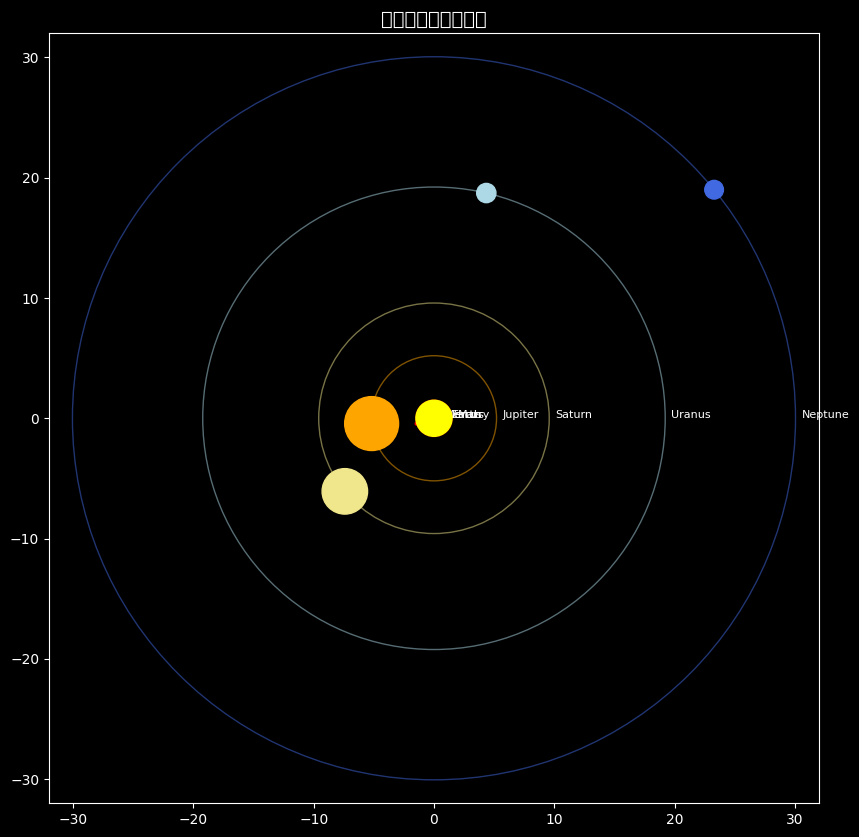

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import patches

# 行星數據 (距離以天文單位AU計，週期以地球年計)
# [名稱, 距離, 週期, 顏色, 大小]
planets = [
    ["Mercury", 0.39, 0.24, "gray", 0.38],
    ["Venus", 0.72, 0.62, "gold", 0.95],
    ["Earth", 1.00, 1.00, "blue", 1.00],
    ["Mars", 1.52, 1.88, "red", 0.53],
    ["Jupiter", 5.20, 11.86, "orange", 11.2],
    ["Saturn", 9.58, 29.46, "khaki", 9.45],
    ["Uranus", 19.22, 84.01, "lightblue", 4.00],
    ["Neptune", 30.05, 164.8, "royalblue", 3.88]
]

# 設置畫布
fig, ax = plt.subplots(figsize=(10, 10))
plt.style.use('dark_background')

# 設置坐標範圍
max_distance = 32
ax.set_xlim(-max_distance, max_distance)
ax.set_ylim(-max_distance, max_distance)

# 添加標題
ax.set_title('太陽系行星軌道模擬', fontsize=14)

# 繪製太陽
sun = plt.Circle((0, 0), 1.5, color='yellow', zorder=10)
ax.add_patch(sun)

# 儲存行星對象和軌道
planet_objects = []
orbit_lines = []

# 創建行星和軌道
for name, distance, period, color, size in planets:
    # 繪製軌道
    orbit = plt.Circle((0, 0), distance, fill=False, color=color, alpha=0.5)
    ax.add_patch(orbit)

    # 創建行星
    planet = plt.Circle((0, 0), 0.2 * size, color=color, zorder=5)
    ax.add_patch(planet)
    planet_objects.append((planet, distance, period))

    # 添加行星名稱
    ax.text(distance + 0.5, 0, name, color='white', fontsize=8)

# 添加適當的比例
ax.set_aspect('equal')

# 模擬動畫
def update(frame):
    for i, (planet, distance, period) in enumerate(planet_objects):
        # 計算行星位置
        angle = (frame / 20) * (2 * np.pi / period)
        x = distance * np.cos(angle)
        y = distance * np.sin(angle)
        planet.center = (x, y)

    return planet_objects

# 創建動畫
animation = FuncAnimation(fig, update, frames=360, interval=50, blit=False)

# 保存為GIF
animation.save('solar_system2.gif', writer='pillow', fps=30, dpi=100)

plt.show()